Note: This Notebook is an example of application of using Machine Learning in Oil and Gas Industry.
This notebook is a model that based on Volve Field data, which is located in North Sea, Norway. In our notebook we'll go to use Machine Learning Algorithms for predicting Oil production, by using the Volve Field data.
1. We'll begin, by doing EDA(Exploratory Data Analysis) to explore our data.
2. Doing Data preprocessing, by imputation and eliminating the Nan, empty data and unuseful features.
3. Train and validate our data.
4. Applying the proposed machine learning algorithms.
5. Compare the applied algorithms, to find out which model is giving the best performance.
6. Comparing the Predicted production rate with the actual one.

1st lets import the librarys that we gonna use in our model

In [169]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

2nd Lets begin by loading the data for Volve Field


In [170]:
df = pd.read_excel("Volve production data.xlsx")
df

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
1,2014-04-08 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2009-12-21 09:36:49,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,9.613611,276.06430,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15828,2009-12-21 21:37:47,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,12.016111,276.13684,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15829,2009-12-22 16:24:17,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,18.775000,275.92102,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15830,2009-12-23 21:44:33,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,29.337778,275.53076,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP


In [171]:
df.columns

Index(['DATEPRD', 'WELL_BORE_CODE', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME',
       'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE',
       'NPD_FACILITY_NAME', 'ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE',
       'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS',
       'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [172]:
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [173]:
df.describe()

,NPD_WELL_BORE_CODE,NPD_FIELD_CODE,NPD_FACILITY_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15832.000000,15832.0,15832.0,15547.000000,9178.000000,8980.000000,8980.000000,7890.000000,8919.000000,9353.000000,9146.000000,15340.000000,9359.000000,9359.000000,9359.000000,5706.000000
mean,5925.845692,3420717.0,369304.0,20.194546,183.608444,77.162969,154.028787,14.856100,55.168533,44.417177,67.728440,11.441060,1075.778328,158099.288758,1640.521149,5315.480815
std,663.147678,0.0,0.0,8.931579,109.222496,45.657948,76.752373,8.406822,36.692924,25.345494,27.719028,19.816928,1317.230128,187321.566850,1703.157446,2181.486695
min,5351.000000,3420717.0,369304.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000,0.000000
25%,5599.000000,3420717.0,369304.0,23.990745,0.000000,0.000000,83.665361,10.841437,18.952989,30.869723,56.577834,0.000000,187.660000,28865.730000,11.775000,4338.204674
50%,5693.000000,3420717.0,369304.0,24.000000,234.728084,103.186689,175.588861,16.308598,52.096877,37.273219,80.071250,2.384969,540.400000,84910.090000,896.590000,5504.739769
75%,5769.000000,3420717.0,369304.0,24.000000,256.920576,106.276591,204.319964,21.306125,99.924288,56.366408,88.062202,13.765020,1311.265000,199618.915000,3239.755000,6781.058040
max,7405.000000,3420717.0,369304.0,120.000000,397.588550,108.502178,345.906770,30.019828,100.000000,137.311030,93.509584,125.718570,5901.840000,851131.520000,8019.740000,10013.600000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15832 entries, 0 to 15831
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15832 non-null  datetime64[ns]
 1   WELL_BORE_CODE            15832 non-null  object        
 2   NPD_WELL_BORE_CODE        15832 non-null  int64         
 3   NPD_WELL_BORE_NAME        15832 non-null  object        
 4   NPD_FIELD_CODE            15832 non-null  int64         
 5   NPD_FIELD_NAME            15832 non-null  object        
 6   NPD_FACILITY_CODE         15832 non-null  int64         
 7   NPD_FACILITY_NAME         15832 non-null  object        
 8   ON_STREAM_HRS             15547 non-null  float64       
 9   AVG_DOWNHOLE_PRESSURE     9178 non-null   float64       
 10  AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 11  AVG_DP_TUBING             8980 non-null   float64       
 12  AVG_ANNULUS_PRESS 

In [175]:
df.shape

(15832, 24)

As we see, there is :
15832 ----> Rows
24 ---> Column

Now lets, use heatmap diagram for all the fields in our dataset to visulaizse our data in more depth

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

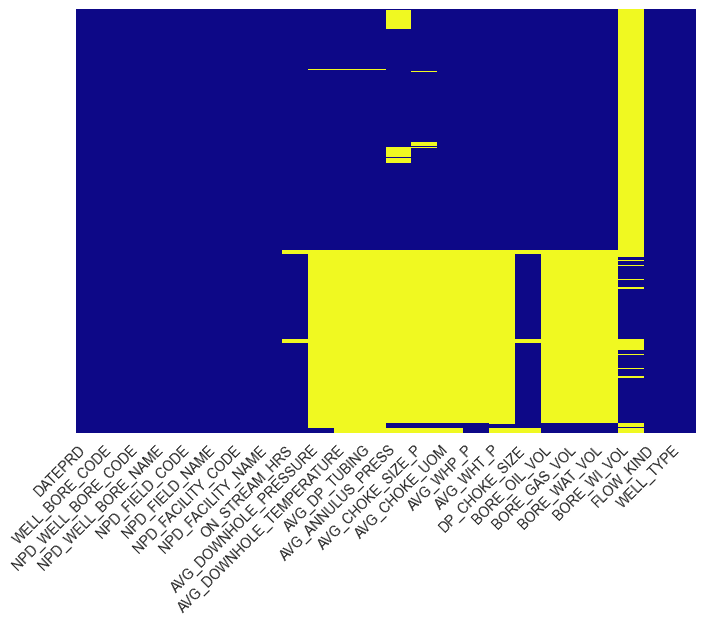

In [176]:
A= sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.xticks(rotation = 45, ha = 'right')

The yellow colors represent the Nan values in the dataset

Ib this stage we'll look at which features that be usefull for us in our model

Lets discover the feature more in depth

In [177]:
df['WELL_TYPE'].unique()

array(['OP', 'WI'], dtype=object)

As we see, the wells either Producer(oil), or injecter(WI=Water Injector)

In [178]:
df["NPD_WELL_BORE_CODE"]

0        7405
1        7405
2        7405
3        7405
4        7405
         ... 
15827    7289
15828    7289
15829    7289
15830    7289
15831    7289
Name: NPD_WELL_BORE_CODE, Length: 15832, dtype: int64

These are well names. So we have 10 wells between (OP AND WI)(Oil producer, Water Injector)

It will be a usefull to isolate the Oil producer wells from Water Injectors(WI)

In [265]:
df[df["WELL_TYPE"] == "WI"]["NPD_WELL_BORE_CODE"].unique()


array([7405, 5693, 5769], dtype=int64)

The water injectors wells

Now its time for oil wells

In [179]:
df[df["WELL_TYPE"] == "OP"]["NPD_WELL_BORE_CODE"].unique()

array([7405, 7078, 5599, 5351, 7289, 5769], dtype=int64)

So as wee see only 6 Oil PRODUCERS

Now lets save it to a variable, lets call it "df_only_op"

In [180]:
df_only_op = df[df["WELL_TYPE"] == "OP"]

In [181]:
df_only_op

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,0.00000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
1,2014-04-08 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,NaN,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,310.37614,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2009-12-21 09:36:49,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,9.613611,276.06430,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15828,2009-12-21 21:37:47,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,12.016111,276.13684,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15829,2009-12-22 16:24:17,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,18.775000,275.92102,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15830,2009-12-23 21:44:33,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,29.337778,275.53076,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP


Now lets drop the features that will not be use for finding the production rate

In [182]:
df_only_op.drop(labels=["WELL_BORE_CODE","NPD_WELL_BORE_NAME", "NPD_FIELD_CODE", "NPD_FIELD_NAME", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME", "AVG_CHOKE_UOM", "FLOW_KIND", "WELL_TYPE"], axis=1)

,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
0,2014-04-07 00:00:00,7405,0.000000,0.00000,0.00000,0.00000,0.0,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
1,2014-04-08 00:00:00,7405,0.000000,NaN,NaN,NaN,0.0,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
2,2014-04-09 00:00:00,7405,0.000000,NaN,NaN,NaN,0.0,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
3,2014-04-10 00:00:00,7405,0.000000,NaN,NaN,NaN,0.0,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN
4,2014-04-11 00:00:00,7405,0.000000,310.37614,96.87589,277.27826,0.0,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2009-12-21 09:36:49,7289,9.613611,276.06430,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN
15828,2009-12-21 21:37:47,7289,12.016111,276.13684,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN
15829,2009-12-22 16:24:17,7289,18.775000,275.92102,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN
15830,2009-12-23 21:44:33,7289,29.337778,275.53076,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN


Lets visualize the remaning features in heatmap diagram

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0.5, 0, 'DATEPRD'),
  Text(1.5, 0, 'WELL_BORE_CODE'),
  Text(2.5, 0, 'NPD_WELL_BORE_CODE'),
  Text(3.5, 0, 'NPD_WELL_BORE_NAME'),
  Text(4.5, 0, 'NPD_FIELD_CODE'),
  Text(5.5, 0, 'NPD_FIELD_NAME'),
  Text(6.5, 0, 'NPD_FACILITY_CODE'),
  Text(7.5, 0, 'NPD_FACILITY_NAME'),
  Text(8.5, 0, 'ON_STREAM_HRS'),
  Text(9.5, 0, 'AVG_DOWNHOLE_PRESSURE'),
  Text(10.5, 0, 'AVG_DOWNHOLE_TEMPERATURE'),
  Text(11.5, 0, 'AVG_DP_TUBING'),
  Text(12.5, 0, 'AVG_ANNULUS_PRESS'),
  Text(13.5, 0, 'AVG_CHOKE_SIZE_P'),
  Text(14.5, 0, 'AVG_CHOKE_UOM'),
  Text(15.5, 0, 'AVG_WHP_P'),
  Text(16.5, 0, 'AVG_WHT_P'),
  Text(17.5, 0, 'DP_CHOKE_SIZE'),
  Text(18.5, 0, 'BORE_OIL_VOL'),
  Text(19.5, 0, 'BORE_GAS_VOL'),
  Text(20.5, 0, 'BORE_WAT_VOL'),
  Text(21.5, 0, 'BORE_WI_VOL'),
  Text(22.5, 0, 'FLOW_KIND'),
  Text(23.5, 0, 'WELL_TYPE')])

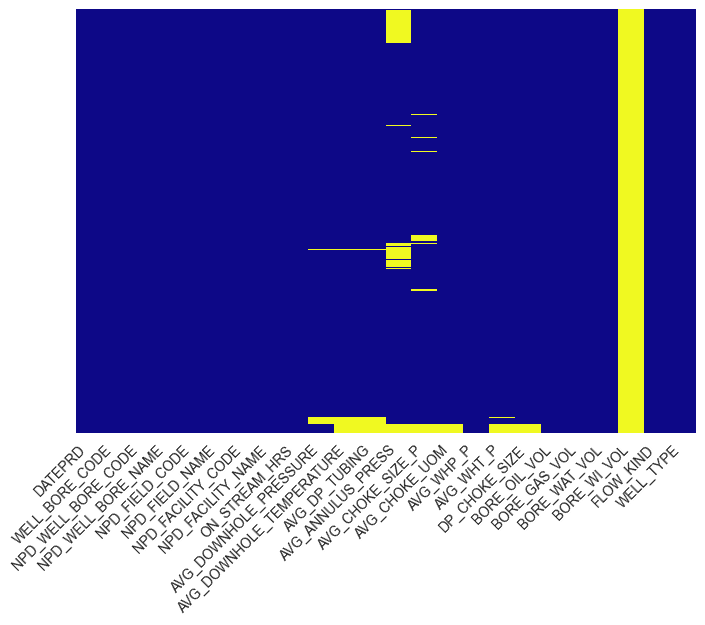

In [183]:
sns.heatmap(df_only_op.isnull(),yticklabels=False,cbar=False,cmap='plasma')
plt.xticks(rotation = 45, ha = 'right')

This time, the features are much clear except for one feature which is "BORE_WI_VOL" which is represent water injection (WI). As you remember we kicked out all the wells out from our data except for (OP) which is "Oil Producer Wells", so that the reseaon why ""BORE_WI_VOL"" its Nan value in our diagram

Now, lets plot those 6 oil producer wells that we concluded in our data to see how much each one of them produce oil by using seaborn "ecdfplot"plot

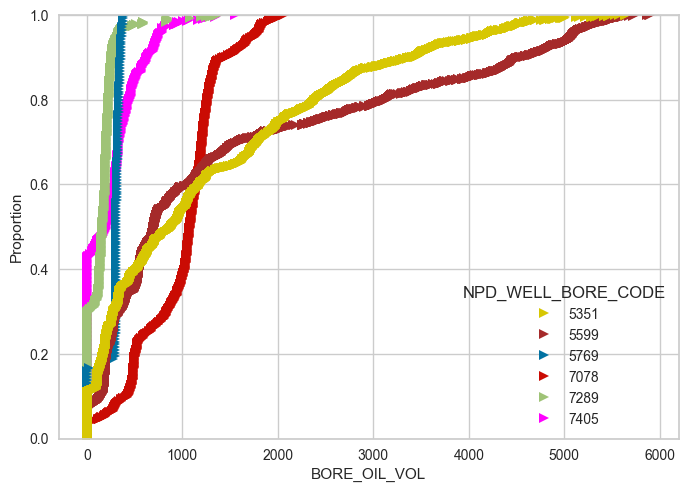

In [184]:
sns.ecdfplot(data=df_only_op, x='BORE_OIL_VOL', hue='NPD_WELL_BORE_CODE', marker='>', ls='none', palette=['y', 'brown', 'b', 'r', 'g', 'magenta'])
plt.show()


Interprtations:
Acording to the graph:
1. Well 7405 -->40% of data zero
2. Well 7289 -->35% of data zero
3. Well 5351 -->16% of data zero
So this a problem when we co pare to the other wells, which thier production is sicnificant much highter than these three wells.

Note:In THE mentioned wells, if we look at the excell file, we noticed its at some point there's no data! And thats because these wells at that moment reached its full production of water after iliminate all oil the the water amount will increase. Why becuase in the oil production the water also produce but at lower level ! when the water level becoms more than is allowed we shoudoun that well. So for that reason these wells data after some point iliminated "this is from a petroleum background knowldge", and from machinne learning knowldge the above paragraph does the job.

This time we'll plot the same above data but using "scatter plot" as follow

In [185]:
import plotly.express as px
df_only_op["NPD_WELL_BORE_CODE"] = df_only_op["NPD_WELL_BORE_CODE"].astype(str)

fig = px.scatter(df_only_op, x="DATEPRD", y="BORE_OIL_VOL", color="NPD_WELL_BORE_CODE")
fig.show()

C:\Users\algak\AppData\Local\Temp\ipykernel_19340\3186526984.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Interpertaions :
1. The well 5599 & 5351 are the most producers among the others
2. Its seems sometimes the wells are shut in and we come check that from our excell data by looking at stream houres.
3. The wells 7405, 7078, 5769 are begin to producing after 2013.After the wells 5599 & 5351 production rate declined.


Before dive into our models, lets see how the features are corelated by using "heatmap"

C:\Users\algak\AppData\Local\Temp\ipykernel_19340\1814622487.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

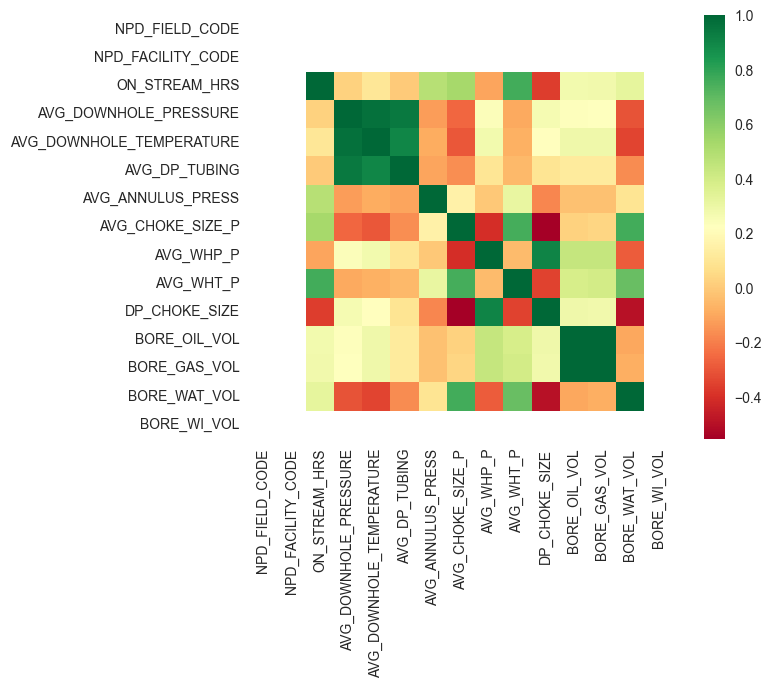

In [264]:
sns.heatmap(df_only_op.corr(),square=True,cmap='RdYlGn')


In [186]:
df_only_op.isnull().sum()


DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE        165
AVG_DOWNHOLE_TEMPERATURE     363
AVG_DP_TUBING                363
AVG_ANNULUS_PRESS           1468
AVG_CHOKE_SIZE_P             440
AVG_CHOKE_UOM                198
AVG_WHP_P                      6
AVG_WHT_P                    212
DP_CHOKE_SIZE                204
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9342
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

In [189]:
df_only_op["AVG_DOWNHOLE_PRESSURE"] = df_only_op["AVG_DOWNHOLE_PRESSURE"].replace(np.NaN, df["AVG_DOWNHOLE_PRESSURE"].mean())
# df_only_op.dropna(inplace=True)
# df_only_op
df_only_op

C:\Users\algak\AppData\Local\Temp\ipykernel_19340\3736396788.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,...,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,0.000000,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
1,2014-04-08 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,183.608444,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,183.608444,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,183.608444,...,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11 00:00:00,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.000000,310.376140,...,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15827,2009-12-21 09:36:49,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,9.613611,276.064300,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15828,2009-12-21 21:37:47,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,12.016111,276.136840,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15829,2009-12-22 16:24:17,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,18.775000,275.921020,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP
15830,2009-12-23 21:44:33,NO 15/9-F-15 C,7289,15/9-F-15,3420717,VOLVE,369304,MÆRSK INSPIRER,29.337778,275.530760,...,NaN,0.00000,NaN,NaN,0.0,0.0,0.0,NaN,production,OP


In [190]:
df_only_op.isnull().sum()


DATEPRD                        0
WELL_BORE_CODE                 0
NPD_WELL_BORE_CODE             0
NPD_WELL_BORE_NAME             0
NPD_FIELD_CODE                 0
NPD_FIELD_NAME                 0
NPD_FACILITY_CODE              0
NPD_FACILITY_NAME              0
ON_STREAM_HRS                  0
AVG_DOWNHOLE_PRESSURE          0
AVG_DOWNHOLE_TEMPERATURE     363
AVG_DP_TUBING                363
AVG_ANNULUS_PRESS           1468
AVG_CHOKE_SIZE_P             440
AVG_CHOKE_UOM                198
AVG_WHP_P                      6
AVG_WHT_P                    212
DP_CHOKE_SIZE                204
BORE_OIL_VOL                   0
BORE_GAS_VOL                   0
BORE_WAT_VOL                   0
BORE_WI_VOL                 9342
FLOW_KIND                      0
WELL_TYPE                      0
dtype: int64

Scale our data set
during these period to use the features that use in calculating production rate "from petroleum domain knowldge", these features are :
1. ON_STREAM_HRS
2. AVG_DOWNHOLE_PRESSURE
3. AVG_DP_TUBING
4. AVG_WHP_P
5. AVG_WHT_P
6. DP_CHOKE_SIZE
7. BORE_OIL_VOL
8. BORE_OIL_VOL
9. BORE_WAT_VOL

In [191]:
#Import the required libraries
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit


In [192]:
df_algoritm_features = df_only_op.drop(["DATEPRD", "WELL_BORE_CODE", "NPD_WELL_BORE_NAME", "NPD_FIELD_CODE", "NPD_FIELD_NAME", "NPD_FACILITY_CODE", "NPD_FACILITY_NAME", "AVG_ANNULUS_PRESS", "AVG_CHOKE_UOM", "BORE_WI_VOL", "FLOW_KIND", "WELL_TYPE"], axis=1)
df_algoritm_features

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,7405,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1,7405,0.000000,183.608444,NaN,NaN,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,7405,0.000000,183.608444,NaN,NaN,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,7405,0.000000,183.608444,NaN,NaN,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,7405,0.000000,310.376140,96.87589,277.27826,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15827,7289,9.613611,276.064300,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0
15828,7289,12.016111,276.136840,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0
15829,7289,18.775000,275.921020,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0
15830,7289,29.337778,275.530760,NaN,NaN,NaN,0.00000,NaN,NaN,0.0,0.0,0.0


In [193]:
scaler_all_data = MinMaxScaler()
algoritm_scaled = scaler_all_data.fit_transform(df_algoritm_features)
df_algoritm_scaled = pd.DataFrame(algoritm_scaled)

In [194]:
df_algoritm_features.head(5)

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,7405,0.0,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0
1,7405,0.0,183.608444,NaN,NaN,1.003059,0.00000,0.00000,0.00000,0.0,0.0,0.0
2,7405,0.0,183.608444,NaN,NaN,0.979008,0.00000,0.00000,0.00000,0.0,0.0,0.0
3,7405,0.0,183.608444,NaN,NaN,0.545759,0.00000,0.00000,0.00000,0.0,0.0,0.0
4,7405,0.0,310.376140,96.87589,277.27826,1.215987,33.09788,10.47992,33.07195,0.0,0.0,0.0


In [225]:
df_algoritm_features.shape

(9342, 12)

In [203]:
X = df_algoritm_features.filter(['DATEPRD','NPD_WELL_BORE_CODE','ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING', 'AVG_WHP_P', 'AVG_WHT_P', 'DP_CHOKE_SIZE'])
Y = df_algoritm_features[['BORE_OIL_VOL', 'BORE_GAS_VOL']]
print('Features that use in calculation production rate :', X.shape)
print('Target feature "Production rate"', Y.shape)
X.isnull().sum()


Features that use in calculation production rate : (9342, 7)
Target feature "Production rate" (9342, 2)


NPD_WELL_BORE_CODE         0
ON_STREAM_HRS              0
AVG_DOWNHOLE_PRESSURE      0
AVG_DP_TUBING            363
AVG_WHP_P                  6
AVG_WHT_P                212
DP_CHOKE_SIZE            204
dtype: int64

In [213]:
X["AVG_DP_TUBING"] = X["AVG_DP_TUBING"].replace(np.NaN, df["AVG_DP_TUBING"].mean())
X.isnull().sum()


NPD_WELL_BORE_CODE         0
ON_STREAM_HRS              0
AVG_DOWNHOLE_PRESSURE      0
AVG_DP_TUBING              0
AVG_WHP_P                  6
AVG_WHT_P                212
DP_CHOKE_SIZE            204
dtype: int64

In [215]:
X["AVG_WHP_P"] = X["AVG_WHP_P"].replace(np.NaN, df["AVG_WHP_P"].mean())
X.isnull().sum()


NPD_WELL_BORE_CODE         0
ON_STREAM_HRS              0
AVG_DOWNHOLE_PRESSURE      0
AVG_DP_TUBING              0
AVG_WHP_P                  0
AVG_WHT_P                212
DP_CHOKE_SIZE            204
dtype: int64

In [216]:
X["AVG_WHT_P"] = X["AVG_WHT_P"].replace(np.NaN, df["AVG_WHT_P"].mean())
X.isnull().sum()

NPD_WELL_BORE_CODE         0
ON_STREAM_HRS              0
AVG_DOWNHOLE_PRESSURE      0
AVG_DP_TUBING              0
AVG_WHP_P                  0
AVG_WHT_P                  0
DP_CHOKE_SIZE            204
dtype: int64

In [217]:
X["DP_CHOKE_SIZE"] = X["DP_CHOKE_SIZE"].replace(np.NaN, df["DP_CHOKE_SIZE"].mean())
X.isnull().sum()

NPD_WELL_BORE_CODE       0
ON_STREAM_HRS            0
AVG_DOWNHOLE_PRESSURE    0
AVG_DP_TUBING            0
AVG_WHP_P                0
AVG_WHT_P                0
DP_CHOKE_SIZE            0
dtype: int64

Test & Train Phase

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, shuffle = True)


Time=df.iloc[:,0]
Time_train, Time_test = train_test_split(Time, test_size=0.3, random_state=42)

In [220]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
result = []

In [221]:
#Lets apply our proposed models
#Import the required libraries
# importing the required libraries
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.regressor import PredictionError
from sklearn.neighbors import KNeighborsRegressor


In [222]:
#1st Random Forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [223]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = rf_param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)
rf_predict = rf_random.predict(X_test)
score_rf = r2_score(y_test,rf_predict)
result.append(score_rf)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [224]:
print("r_square score --> ",score_rf)
print('Mean Absolute Error -->', metrics.mean_absolute_error(y_test, rf_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

r_square score -->  0.9842541082656312
Mean Absolute Error --> 5452.424254451571
Mean Squared Error --> 283774252.62877864
Root Mean Squared Error --> 16845.60039383514


#lets see if we can play with feature importance

In [240]:
# We require to import the time library for the run time evaluation
import time

# All features training and testing time
all_features_time = []

# We decide to do 10 iterations and take average for all features
for _ in range(10):
    start_time = time.time()
    rf.fit(X_train, y_train)
    all_features_predictions = rf.predict(X_test)
    end_time = time.time()
    all_features_time.append(end_time - start_time)

all_features_time = np.mean(all_features_time)
print('All features total training and testing time:', round(all_features_time, 2), 'seconds.')

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Co

All features total training and testing time: 2.19 seconds.


C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [241]:
best_random = rf_random.best_estimator_.fit(X_train, y_train)
predictions_best_random_test = best_random.predict(X_test)
predictions_best_random_train = best_random.predict(X_train)

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [242]:
result_df = pd.DataFrame({'BORE_OIL_VOL': y_test, 'Predicted': predictions_best_random_test})
result_df

ValueError: Per-column arrays must each be 1-dimensional

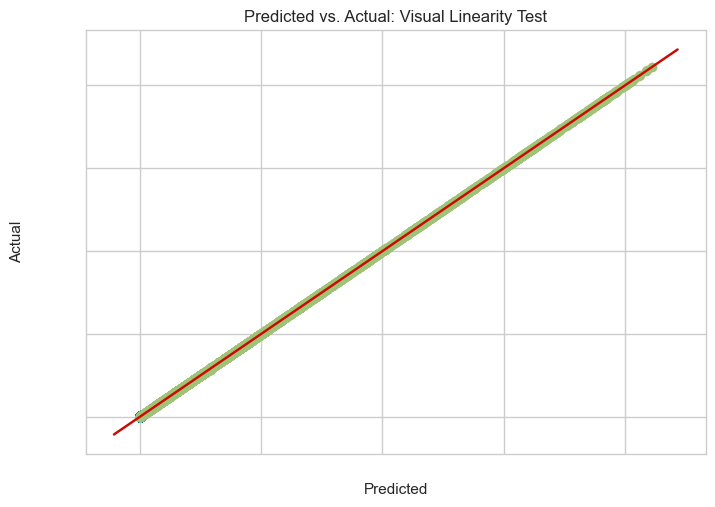

In [243]:
from scipy import stats
import statsmodels as sm

y = y_train
X_train_np = np.array(X_train)
y_np = np.array(y)

def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

#predict y values for training data
y_hat = predictions_best_random_train

#plot predicted vs actual
plt.plot(y_hat,y_np,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Predicted vs. Actual: Visual Linearity Test')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



YellowbrickValueError: y must be a (1,) dimensional array not (2803, 2)

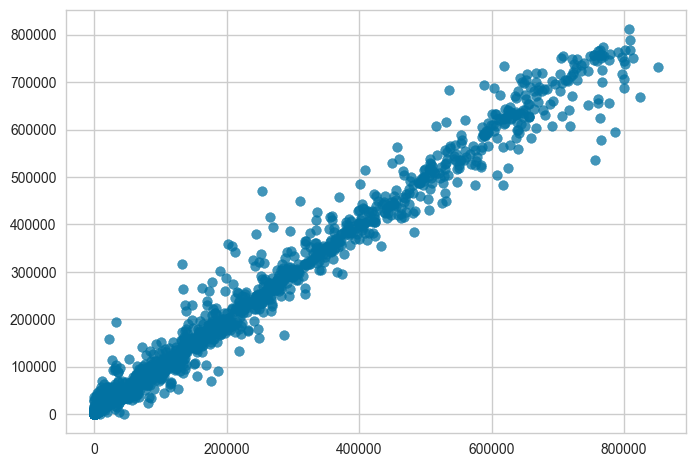

In [244]:
visualizer = PredictionError(rf_random)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [249]:
#2nd KNN Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predict = knn.predict(X_test)
score_knn = r2_score(y_test,knn_predict)
result.append(score_knn)



C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



In [250]:
print("r_square score --> ",score_knn)
print('Mean Absolute Error -->', metrics.mean_absolute_error(y_test, knn_predict))
print('Mean Squared Error -->', metrics.mean_squared_error(y_test, knn_predict))
print('Root Mean Squared Error -->', np.sqrt(metrics.mean_squared_error(y_test, knn_predict)))

r_square score -->  0.974879501172839
Mean Absolute Error --> 6265.969895309878
Mean Squared Error --> 444252856.1668529
Root Mean Squared Error --> 21077.30666301681


C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

C:\Users\algak\PycharmProjects\Mi_Uni_Course\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



YellowbrickValueError: y must be a (1,) dimensional array not (2803, 2)

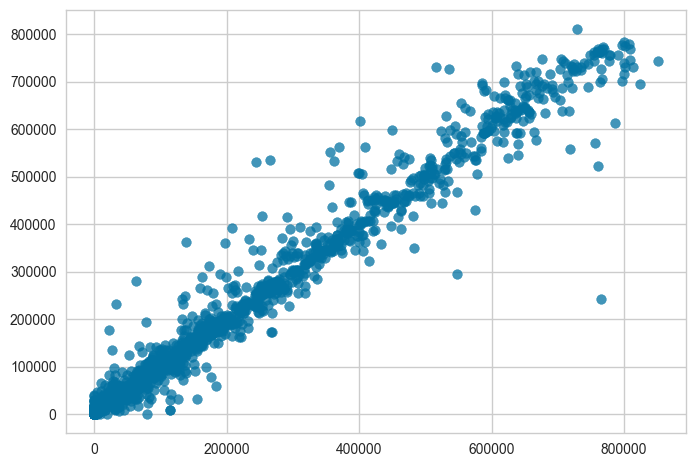

In [253]:
#Let's visualize it
visualizer = PredictionError(knn)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [263]:
models = pd.DataFrame({
                'Models': [ 'Random Forest',
                           'K-Near Neighbors'],
                'Score':  [ score_rf, score_knn]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,Random Forest,0.984254
1,K-Near Neighbors,0.974880
